# Wstęp

Zadanie nr 13 wprowadza zagadnienie głębokich modeli uczenia ze wzmocnieniem (*Deep Reinforcement Learning*, **DRL**) - modeli, które uczone są przez interakcję z otoczeniem, obserwując konsekwencję działań oraz przyznawaną wartość nagrody.

## Cel ćwiczenia

Celem ćwiczenia jest zapoznanie z:
* koncepcją głębokiego uczenia ze wzmocnieniem,
* podstawowymi podejściami w głębokim uczeniu ze wzmocnieniem,
* przykładowymi środowiskami, wykorzystywanym w DRL,
* jedną z podstawowych metod DRL opartą na funkcji wartości.


# Głębokie uczenie ze wzmocnieniem

Podstawa reinforcement learning jest uczenie przez interakcje ̨: agent oddziałuje z otoczeniem i, obserwując konsekwencje jego działań, może uczyć się jak zmienić swoje zachowanie by zmaksymalizować wartość otrzymanej nagrody.

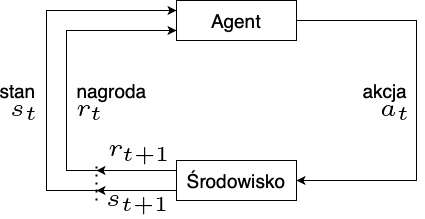

Zasada działania modelu uczenia ze wzmocnieniem jest następująca: autonomiczny agent, sterowany przez model, obserwuje **stan $s_t$ środowiska** w kroku czasowym $t$. Agent oddziałuje z otoczeniem podejmując **akcję $a_t$**, co powoduje przejście otoczenia i agenta do nowego stanu $s_{t+1}$. Przejście to odbywa się na podstawie **funkcji przejścia stanów $T(s_{t+1} | s_t, a_t)$** (równoważnej środowisku) - na podstawie aktualnego stanu i podjętej akcji. Zakładamy, że informacja o stanie jest wystarczająca dla agenta do podjęcia optymalnej akcji.

Sekwencja akcji wybierana jest na podstawie nagrody, przyznawanej przez otoczenie agentowi. Każde przejście środowiska do nowego stanu powoduje nagrodzenie agenta **nagrodą $r_t$**, tj. wartością skalarną, określającą "poprawność" podjętej decyzji. Celem uczenia modelu DRL jest wyuczenie **strategii**, maksymalizującej łączną uzyskiwaną wartość nagrody (*zwrot*).

Agent uczenia ze wzmocnieniem może składać się z następujących elementów (w zależności od stosowanego podejścia zawiera jeden lub więcej z nich):
* **strategia** (ang. *policy*), tj. funkcja zachowywania się agenta; może być deterministyczna $a = \pi(s)$ lub stochastyczna $\pi(a|s)=p(a_t=a | s_t=s)$;
* **funkcja wartości** (ang. *value function*), tj. funkcja służąca do predykcji przyszłej nagrody, używana do oceny stanów przy podejmowaniu akcji:
$$V_{\pi}(s)=\mathbb{E}\left[r_{t+1}+\gamma r_{t+2}+\gamma^2 r_{t+3}+\dots | s_t=s\right],$$
gdzie $\gamma\in[0, 1]$ to współczynnik dyskontowania, określający, w jakim stopniu faworyzowane są nagrody natychmiastowe;
* **model**, służący do predykcji zmian w środowisku:
$$\mathcal{P}_{ss'}^a = p(s_{t+1}=s | s_t=s, a_t=a),$$
$$\mathcal{R}_s^a = \mathbb{E}[r_{t+1} | s_t=s, a_t=a],$$
gdzie $\mathcal{P}$ przewiduje kolejny krok, a $\mathcal{R}$ wskazuje następną wartość nagrody.

W zależności od elementów metody uczenia ze wzmocnieniem dzielimy na:
* oparte na funkcji wartości (bez strategii) - trenujemy model aby poprawnie oceniał wartość nagrody za każdą z możliwych podejmowanych akcji,
* oparte na strategii (bez funkcji wartości) - *policy gradient* - trenujemy model strategii, która bezpośrednio zwraca akcje, maksymalizujące wartość nagrody,
* aktor-krytyk (wykorzystujące strategię oraz funkcję wartości) - połączenie powyższych (aktor to model strategii, kontrolujący zachowanie agenta, a krytyk to model funkcji wartości, oceniająca akcje podejmowane przez krytyka).

Każda z tych metod może być też *model-free* (bez wykorzystania modelu środowiska) lub *model-based* (modelująca środowisko).

W tym zadaniu skupimy się na **podejściu *model-free* opartym na funkcji wartości**.


## Funkcje wartości

Podejścia wykorzystujące funkcje wartości to metody oparte na estymowaniu wartości zwrotu (całkowitej nagrody). Wartość ta może być estymowana wyłącznie na podstawie aktualnego stanu - wówczas mówimy o **funkcji stan-wartość** $V^\pi(s) = \mathbb{E}[R | s, \pi]$, która ocenia wartość nagrody przy założeniu postępowania od danego stanu zgodnie ze strategią $\pi$. W idealnej sytuacji, optymalna strategia mogłaby być wybierana na podstawie akcji maksymalizujących oczekiwaną wartość nagrody; niestety jednak funkcja przejścia stanów $T(s_{t+1} | s_t, a_t)$ nie jest znana agentowi.

Rozwiązaniem jest konstrukcja funkcji, która będzie estymowała wartość zwrot na podstawie stanu oraz podejmowanej akcji - **funkcja jakości** $Q^\pi(s, a) = \mathbb{E}[R | s, a, \pi]$ - tu oceniana jest wartość zwrotu po podjęciu danej akcji w danym stanie, przy postępowaniu dalej zgodnie ze strategią $\pi$. Wówczas, najlepsza strategia może być znaleziona przez zachłanny wybór akcji maksymalizującej wartość funkcji $Q$: $\arg\max_a Q^\pi(s, a)$, w ten sposób definiując aproksymację poszukiwanej funkcji wartości na podstawie maksymalizowania funkcji jakości:

$$V^\pi(s) \approx \max_a Q^\pi(s, a).$$

W takim podejściu skupiamy się na eksploatacji aktualnie wykrytego maksimum; często jednak chcielibyśmy również eksplorować rozwiązania alternatywne, na co pozwala strategia $\epsilon$-zachłanna (z prawdopodobieństwem $1-\epsilon$ wybieramy maksymalizującą akcję, a z prawdopodobieństwem $\epsilon$ - losową).

Wartość funkcji jakości może być obliczona ze wzoru rekurencyjnego:

$$Q^\pi(s_t, a_t) = \mathbb{E}_{s_{t+1}}\left[r_t + \gamma Q^\pi\left(s_{t+1}, \pi(s_{t+1})\right)\right],$$

mówimy wówczas o podejściu *on-policy* - do estymacji całkowitej wartości zwrotu i wyboru akcji wykorzystuje się aktualną postać strategii (np. algorytm [SARSA](https://en.wikipedia.org/wiki/State–action–reward–state–action)). Alternatywnie, wybór akcji i estymacja wartości zwrotu może odbywać się poprzez zachłanny wybór akcji maksymalizującej wartość nagrody - mówimy wtedy o algorytmach *off-policy*:

$$Q^\pi(s_t, a_t) = \mathbb{E}_{s_{t+1}}\left[r_t + \gamma \max_a Q^\pi\left(s_{t+1}, a_{t+1}\right)\right].$$

Przykładem drugiej z grup metod jest [Q-learning](https://en.wikipedia.org/wiki/Q-learning). Polega on na budowaniu tabeli pamięci $Q[s, a]$, mającej przechowywać wartości funkcji jakości dla wszystkich możliwych kombinacji stanów $s$ i akcji $a$. Powstaje ona na skutek iteracyjnego próbkowania akcji z bieżącego stanu i zapisywania wartości zwrotu ($Y$), przy dalszym podejmowaniu akcji maksymalizujących wartość uzyskiwanej nagrody. Algorytm powtarzany jest iteracyjnie dla wszystkich możliwych akcji w danym stanie, po czym następuje przejście do kolejnego, niezbadanego stanu. W wytrenowanym modelu tabela ta wykorzystywana jest do wyboru akcji, maksymalizując wartość uzyskiwanej funkcji nagrody.


## Deep Q-Learning (DQL)

Algorytm Q-learning jest słabo skalowalny — w szczególności pod względem wymagań pamięciowych oraz złożoności obliczeniowej dla dużych przestrzeni stanów i akcji, dlatego też w DQN tabela pamięci została zastąpiona przez sieć głęboką (ang. *Deep Q-Network*), której zadaniem jest aproksymacja funkcji jakości $Q(s, a)$.

Uczenie tej sieci odbywa się np. z użyciem funkcji celu - błędu średniokwadratowego między predykcją sieci a końcowymi wartościami zwrotu

$$\mathcal{L} = \mathbb{E}\left[\left(r_t + \gamma \max_a Q^\pi\left(s_{t+1}, a_{t+1}\right) - Q^\pi\left(s_t, a_t\right)\right)^2\right].$$

Można także użyć [Huber loss](https://en.wikipedia.org/wiki/Huber_loss).

Algorytm uczenia tej sieci przedstawiony został poniżej:

```{tidy=FALSE, eval=FALSE}
Get(s);                                         // pobierz stan początkowy
for step <- 1, 2, ... till convergence do       // dla kolejnych kroków
    Sample(a);                                  // wybierz akcję (epsilon-zachłannie)
    Get(s');                                    // ustal nowy stan
    if s' is terminal then                      // jeżeli nowy stan jest stanem końcowym
        Y <- sum(r);                            // ustal wartość zwrotu
        Sample(new s');                         // pobierz nowy stan początkowy
    else:
        Y <- r + gamma * Q_step(s', a')'        // aktualizuj estymację zwrotu
    theta_k+1 <- theta - alpha * grad L(theta); // aktualizuj wagi zgodnie z funkcją celu
    s <- s';                                    // weź nowy stan jako aktualny
```

Wybrane ulepszenia:

- **Zmienna wartość $\epsilon$**.
    Zastosowanie stałej wartości $\epsilon$ w strategii $\epsilon$-zachłannej nie jest najlepszym rozwiązaniem. Zwykle wolelibyśmy, żeby w początkowym etapie model bardziej eksplorował przestrzeń (wyższy $\epsilon$), a w późniejszym etapie by eksploatował znalezione optimum (niższy $\epsilon$). Często stosuje się w tym celu funkcję wykładniczą.

- ***Target network***.
    Stosowane w celu poprawy stabilności trenowania. Polega ono na wykorzystaniu odrębnych instancji do działania w środowisku (*target network*) i odrębnej do trenowania w każdej iteracji (*policy network*). Początkowo, obie sieci są swoimi kopiami, a ich wagi są synchronizowane w trakcie trenowania w określonych interwałach. Algorytm trenowania modelu z *target network* prezentuje się następująco:

    1. Wykonaj kopię modelu (*target network*)
    1. Dla każdego kroku:
        - wykonuj akcję w środowisku z użyciem *policy network* i zapisz czwórkę [stan, akcja, następny stan, nagroda] do utworzenia mini-batcha
        - oblicz oczekiwane wartości funkcji Q używając *target network*
        - oblicz loss i wykonaj propagację wsteczną w *policy network*
    1. Cyklicznie synchronizuj wytrenowane wagi w *policy network* -> *target network*

- ***Experience replay***.
    Podobnie jak *target network* stosowane w celu poprawy stabilności trenowania. Polega ono na zapisywaniu czwórek: stan, akcja, kolejny stan i nagroda $(s_t, a_t, s_{t+1}, r_t)$ w pamięci o ograniczonej wielkości (*experience*). W celu uczenia modelu próbkujemy losowo mini-batch z *experience* i wykorzystujemy do trenowania. W ten sposób model uczony jest na danych niezależnych od siebie, poprawiając stabilność trenowania.

    Wykorzystując *experience replay* algorytm trenowania będzie wyglądał następująco:

    1. Zbuduj pamięć *experience* wykonując akcje niewytrenowanym modelem w środowisku i zapisując czwórki.
    1. Dla każdego kroku uczenia:
        - wykonaj akcję (1 lub więcej) w środowisku i zapisz w pamięci, usuwając najstarszy experience
        - próbkuj batch z experience losowo i wykorzystaj do trenowania modelu (trenowanie odbywa się analogicznie jak wcześniej)


### Uwaga ogólna

Modele DRL, szczególnie w najbardziej "podstawowych" formach są niestabilne przy trenowaniu, dlatego też stosuje się wiele ulepszeń. Ponadto każdy błąd implementacyjny może mieć bardzo duży wpływ na zdolność modelu do wytrenowania, dlatego też w tych listach będziemy się opierać na gotowych implementacjach z biblioteki [**Stable-Baselines3**](https://stable-baselines.readthedocs.io). Opiera się ona na PyTorchu i zawiera sprawdzone i przetestowane implementacje wielu popularnych metod głębokiego uczenia ze wzmocnieniem. W tym laboratorium skupimy się na wspomnianej wcześniej metodzie Deep Q-Learning.


## Środowisko

W laboratorium będziemy wykorzystali bibliotekę [Gym](https://gym.openai.com) - zestaw narzędzi do budowy i porównywania algorytmów uczenia ze wzmocnieniem. Zawiera ona środowiska o różnym poziomie złożoności - zaczniemy od prostego środowiska - [CartPole](https://gym.openai.com/envs/CartPole-v1/)

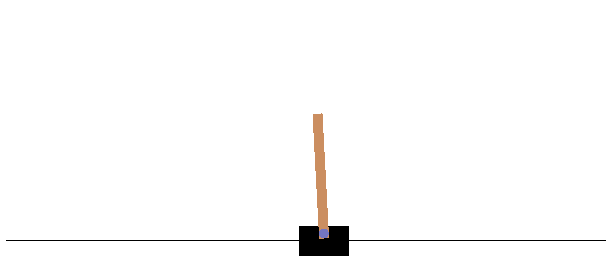
> oparte na: Barto, Sutton & Anderson *Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem*, 1983

Słupek zamocowany jest do wózka, który porusza się bez tarcia po ścieżce. Przestrzeń stanów jest czteroelementowa:
* pozycja wózka, 
* szybkość wózka, 
* kąt nachylenia słupka, 
* szybkość obrotu słupka.

Możemy kontrolować ruch wózka przykładając do niego siłę +1 lub -1. Celem jest zapobieganie przewróceniu słupka. Nagroda +1 przyznawana jest za każdy krok, kiedy słupek pozostaje pionowo. Epizod kończy się, gdy słupek odchylony jest o więcej niż 15 stopni od pionu, lub gry wózek odsunie się o ponad 2,4 jednostki od środka.


In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay stable-baselines3[extra] > /dev/null 2>&1


In [2]:
import os
import random

import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import animation
from pyvirtualdisplay import Display
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import plot_results, load_results
from stable_baselines3.dqn.policies import MlpPolicy

from IPython import display as ipythondisplay


SEED = 13
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

DISPLAY = Display(visible=0, size=(400, 300))
DISPLAY.start()


Metoda Deep Q-Learning wraz z wymienionymi wcześniej ulepszeniami jest już zaimplementowana w bibliotece Stable-Baselines3. Najpierw sprawdźmy hiperparametry, jakie możemy podać do modelu:


In [3]:
help(DQN)


Help on class DQN in module stable_baselines3.dqn.dqn:

class DQN(stable_baselines3.common.off_policy_algorithm.OffPolicyAlgorithm)
 |  DQN(policy: Union[str, Type[stable_baselines3.dqn.policies.DQNPolicy]], env: Union[gym.core.Env, stable_baselines3.common.vec_env.base_vec_env.VecEnv, str], learning_rate: Union[float, Callable[[float], float]] = 0.0001, buffer_size: int = 1000000, learning_starts: int = 50000, batch_size: int = 32, tau: float = 1.0, gamma: float = 0.99, train_freq: Union[int, Tuple[int, str]] = 4, gradient_steps: int = 1, replay_buffer_class: Optional[Type[stable_baselines3.common.buffers.ReplayBuffer]] = None, replay_buffer_kwargs: Optional[Dict[str, Any]] = None, optimize_memory_usage: bool = False, target_update_interval: int = 10000, exploration_fraction: float = 0.1, exploration_initial_eps: float = 1.0, exploration_final_eps: float = 0.05, max_grad_norm: float = 10, stats_window_size: int = 100, tensorboard_log: Optional[str] = None, policy_kwargs: Optional[Dict

Kluczowym argumentem podawanym do modelu jest `policy`, czyli model strategii wykorzystywany w modelu. W Stable-Baselines3 każda metoda DRL posiada własny zestaw strategii - w przypadku DQN dostępne są trzy wersje (moduł `stable_baselines3.dqn.policies`:
- `MlpPolicy` - w pełni połączona
- `CnnPolicy` - z warstwami konwolucyjnymi
- `MultiInputPolicy` - dla środowisk, które umożliwiają obserwacje w formie obrazów jak i wartości.

W tym przykładzie będziemy wykorzystywać `MlpPolicy`, ponieważ środowisko nie zwraca obserwacji w formie obrazów. Sprawdźmy zatem, jakie argumenty ona przyjmuje (mogą one być przekazywane przez argument modelu `policy_kwargs`).


In [4]:
help(MlpPolicy)


Help on class DQNPolicy in module stable_baselines3.dqn.policies:

class DQNPolicy(stable_baselines3.common.policies.BasePolicy)
 |  DQNPolicy(observation_space: gym.spaces.space.Space, action_space: gym.spaces.space.Space, lr_schedule: Callable[[float], float], net_arch: Optional[List[int]] = None, activation_fn: Type[torch.nn.modules.module.Module] = <class 'torch.nn.modules.activation.ReLU'>, features_extractor_class: Type[stable_baselines3.common.torch_layers.BaseFeaturesExtractor] = <class 'stable_baselines3.common.torch_layers.FlattenExtractor'>, features_extractor_kwargs: Optional[Dict[str, Any]] = None, normalize_images: bool = True, optimizer_class: Type[torch.optim.optimizer.Optimizer] = <class 'torch.optim.adam.Adam'>, optimizer_kwargs: Optional[Dict[str, Any]] = None) -> None
 |  
 |  Policy class with Q-Value Net and target net for DQN
 |  
 |  :param observation_space: Observation space
 |  :param action_space: Action space
 |  :param lr_schedule: Learning rate schedule (

Szczególnie interesującym będzie dla nas argument `net_arch`, definiujący architekturę modelu strategii (jest to lista integerów, opisująca liczbę neuronów w poszczególnych warstwach ukrytych).


Deklarujemy funkcję do wyświetlania działania modelu. Poza tworzeniem animacji wykonuje ona również ewaluację modelu, sprawdzając w 100 epizodach osiąganą całkowitą wartość zwrotu.

Sprawdzimy od razu, jak zachowuje się niewytrenowany (losowy) model (zwróćmy uwagę, że musimy podać model strategii, jak i środowisko, w jakim model ma działać - możemy uzyskać do niego dostęp wywołując metodę modelu `get_env`).


In [3]:
def visualize_model(model, max_steps=50):
    """Show how a model works in the environment."""
    env = model.get_env()
    obs = env.reset()

    fig, ax = plt.subplots()
    frames = []
    done = False

    while not done:
        frames.append(env.render(mode="rgb_array"))
        with torch.no_grad():
            action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        if len(frames) >= max_steps:
            break

    anim = animation.FuncAnimation(
        fig=fig,
        func=lambda i: ax.imshow(frames[i]),
        frames=range(len(frames)),
        interval=100,
        blit=False,
    )
    plt.close()

    reward_avg, reward_std = evaluate_policy(model, env, n_eval_episodes=100)
    print(f"Reward in episode: {reward_avg:.2f} +/- {reward_std:.2f}")

    return anim.to_jshtml()


env = gym.make("CartPole-v1")
model = DQN(MlpPolicy, env)
display(ipythondisplay.HTML(visualize_model(model)))



Reward in episode: 9.28 +/- 0.63


Zaczniemy od deklaracji uproszczonego modelu, ze stałą wartością $\epsilon$, bez target network oraz z experience replay o długości batcha (efektywnie - brakiem experience replay). Następnie będziemy chcieli włączać ulepszenia oraz stroić hiperparametry aby sprawdzić, jak wpływają one na działanie modelu. Do wytrenowania modelu służy metoda `learn`. Sprawdźmy jej parametry.


In [ ]:
help(DQN.learn)

Help on function learn in module stable_baselines3.dqn.dqn:

learn(self, total_timesteps: int, callback: Union[NoneType, Callable, List[stable_baselines3.common.callbacks.BaseCallback], stable_baselines3.common.callbacks.BaseCallback] = None, log_interval: int = 4, eval_env: Union[gym.core.Env, stable_baselines3.common.vec_env.base_vec_env.VecEnv, NoneType] = None, eval_freq: int = -1, n_eval_episodes: int = 5, tb_log_name: str = 'DQN', eval_log_path: Union[str, NoneType] = None, reset_num_timesteps: bool = True) -> stable_baselines3.common.off_policy_algorithm.OffPolicyAlgorithm
    Return a trained model.
    
    :param total_timesteps: The total number of samples (env steps) to train on
    :param callback: callback(s) called at every step with state of the algorithm.
    :param log_interval: The number of timesteps before logging.
    :param tb_log_name: the name of the run for TensorBoard logging
    :param eval_env: Environment that will be used to evaluate the agent
    :param 

Z punktu widzenia analizy działania modelu potrzebna jest jedynie liczba kroków uczenia `total_timesteps`. Możemy też wyregulować częstość ewaluacji oraz logowania (wyświetlanie logu odbywa się jedynie przy ustawieniu `verbose=1`). Oprócz tego chcielibyśmy jednak także wyświetlić krzywą uczenia. Wykorzystujemy w tym celu wrapper na środowisko w Unity `Monitor`. Jako parametry przyjmuje on środowisko, które będziemy monitorować, oraz folder, w którym będziemy zapisywać logi. Możemy je potem wczytać i wyświetlić wykorzystując metody `load_results` i `plot_results`.


In [4]:
RESULTS_DIR = "/tmp/"

env = Monitor(env, filename=RESULTS_DIR)


Deklarujemy model. Ustawiając rozmiar bufora oraz start i częstość trenowania równe wielkości mini-batcha efektywnie wyłączamy experience replay, a aktualizując sieć w interwale równym wielkości batcha model trenowany będzie bez *target network*. Ponadto, dobieramy odpowiednio wartości schedulera $\epsilon$, tak, aby współczynnik ten był stały podczas trenowania.


In [7]:
batch_size = 64
lr = 1e-4
gamma = 0.8
eps = 0.1

env = gym.make("CartPole-v1")
log_dir = "/tmp/vanilla/"
os.makedirs(log_dir, exist_ok=True)  # we have to create this dir - it does not exist
env = Monitor(env, filename=log_dir)

vanilla_dqn = DQN(
    MlpPolicy, env,
    learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
    buffer_size=batch_size, learning_starts=batch_size, train_freq=batch_size,  # disable experience replay
    target_update_interval=batch_size,  # disable target network
    exploration_fraction=1, exploration_initial_eps=eps, exploration_final_eps=eps,  # disable epsilon scheduling
    verbose=1,  # show information throughout training
)


Using cuda device
Wrapping the env in a DummyVecEnv.


Wytrenujmy zatem taki prosty model w 100 000 kroków i sprawdźmy jakie osiągnie on po tym czasie rezultaty.


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4        |
|    fps              | 10383    |
|    time_elapsed     | 0        |
|    total_timesteps  | 57       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 13.6     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2846     |
|    time_elapsed     | 0        |
|    total_timesteps  | 109      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 76       |
|    fps              | 1694     |
|    time_elapsed     | 0        |
|    total_timesteps  | 790      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.479    |
|    n_updates        | 11       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 80       |
|    fps              | 1707     |
|    time_elapsed     | 0        |
|    total_timesteps  | 830      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 148      |
|    fps              | 1636     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1498     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.467    |
|    n_updates        | 22       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 152      |
|    fps              | 1632     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1536     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 220      |
|    fps              | 1654     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2203     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.459    |
|    n_updates        | 33       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 224      |
|    fps              | 1653     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2241     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.455    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 292      |
|    fps              | 1640     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2909     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.462    |
|    n_updates        | 44       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 296      |
|    fps              | 1637     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2948     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.475    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 364      |
|    fps              | 1647     |
|    time_elapsed     | 2        |
|    total_timesteps  | 3621     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.478    |
|    n_updates        | 55       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.89     |
|    ep_rew_mean      | 9.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 368      |
|    fps              | 1648     |
|    time_elapsed     | 2        |
|    total_timesteps  | 3660     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.476    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 436      |
|    fps              | 1653     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4330     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.85     |
|    ep_rew_mean      | 9.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 440      |
|    fps              | 1652     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4366     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.439    |
|    n_updates        | 67       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 508      |
|    fps              | 1665     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5051     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 512      |
|    fps              | 1665     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5089     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.478    |
|    n_updates        | 78       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 580      |
|    fps              | 1661     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5757     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 584      |
|    fps              | 1661     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5794     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.452    |
|    n_updates        | 89       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.74     |
|    ep_rew_mean      | 9.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 652      |
|    fps              | 1661     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6459     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 656      |
|    fps              | 1659     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6500     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.442    |
|    n_updates        | 100      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 9.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 724      |
|    fps              | 1659     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7162     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.72     |
|    ep_rew_mean      | 9.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 728      |
|    fps              | 1659     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7198     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.448    |
|    n_updates        | 111      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 796      |
|    fps              | 1651     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7879     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.392    |
|    n_updates        | 122      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 800      |
|    fps              | 1652     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7916     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.95     |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 868      |
|    fps              | 1657     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8596     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.455    |
|    n_updates        | 133      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 872      |
|    fps              | 1656     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8636     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 940      |
|    fps              | 1658     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9317     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.478    |
|    n_updates        | 144      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 944      |
|    fps              | 1656     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9355     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.515    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.65     |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1012     |
|    fps              | 1655     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10003    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.432    |
|    n_updates        | 155      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.64     |
|    ep_rew_mean      | 9.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1016     |
|    fps              | 1656     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10040    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 9.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1084     |
|    fps              | 1660     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10713    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.458    |
|    n_updates        | 166      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1088     |
|    fps              | 1660     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10749    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1156     |
|    fps              | 1661     |
|    time_elapsed     | 6        |
|    total_timesteps  | 11423    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.39     |
|    n_updates        | 177      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1160     |
|    fps              | 1660     |
|    time_elapsed     | 6        |
|    total_timesteps  | 11470    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.445    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1228     |
|    fps              | 1657     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12138    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1232     |
|    fps              | 1656     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12176    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.422    |
|    n_updates        | 189      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.74     |
|    ep_rew_mean      | 9.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1300     |
|    fps              | 1647     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12844    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 9.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 1645     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12881    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.424    |
|    n_updates        | 200      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.84     |
|    ep_rew_mean      | 9.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1372     |
|    fps              | 1638     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13554    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1376     |
|    fps              | 1639     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13596    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.412    |
|    n_updates        | 211      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1444     |
|    fps              | 1640     |
|    time_elapsed     | 8        |
|    total_timesteps  | 14254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1448     |
|    fps              | 1640     |
|    time_elapsed     | 8        |
|    total_timesteps  | 14297    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.434    |
|    n_updates        | 222      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1516     |
|    fps              | 1638     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14964    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.79     |
|    ep_rew_mean      | 9.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1520     |
|    fps              | 1637     |
|    time_elapsed     | 9        |
|    total_timesteps  | 15004    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.478    |
|    n_updates        | 233      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 1633     |
|    time_elapsed     | 9        |
|    total_timesteps  | 15664    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 9.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 1632     |
|    time_elapsed     | 9        |
|    total_timesteps  | 15701    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.452    |
|    n_updates        | 244      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1660     |
|    fps              | 1630     |
|    time_elapsed     | 10       |
|    total_timesteps  | 16381    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1664     |
|    fps              | 1630     |
|    time_elapsed     | 10       |
|    total_timesteps  | 16419    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.426    |
|    n_updates        | 255      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1732     |
|    fps              | 1627     |
|    time_elapsed     | 10       |
|    total_timesteps  | 17087    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1736     |
|    fps              | 1628     |
|    time_elapsed     | 10       |
|    total_timesteps  | 17127    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.429    |
|    n_updates        | 266      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1804     |
|    fps              | 1626     |
|    time_elapsed     | 10       |
|    total_timesteps  | 17792    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1808     |
|    fps              | 1626     |
|    time_elapsed     | 10       |
|    total_timesteps  | 17833    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.423    |
|    n_updates        | 277      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1876     |
|    fps              | 1622     |
|    time_elapsed     | 11       |
|    total_timesteps  | 18500    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.44     |
|    n_updates        | 288      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 1622     |
|    time_elapsed     | 11       |
|    total_timesteps  | 18538    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1948     |
|    fps              | 1626     |
|    time_elapsed     | 11       |
|    total_timesteps  | 19194    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.78     |
|    ep_rew_mean      | 9.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 1952     |
|    fps              | 1626     |
|    time_elapsed     | 11       |
|    total_timesteps  | 19230    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.404    |
|    n_updates        | 299      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2020     |
|    fps              | 1625     |
|    time_elapsed     | 12       |
|    total_timesteps  | 19909    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.467    |
|    n_updates        | 310      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 1625     |
|    time_elapsed     | 12       |
|    total_timesteps  | 19946    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.79     |
|    ep_rew_mean      | 9.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2092     |
|    fps              | 1626     |
|    time_elapsed     | 12       |
|    total_timesteps  | 20614    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.438    |
|    n_updates        | 321      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2096     |
|    fps              | 1626     |
|    time_elapsed     | 12       |
|    total_timesteps  | 20651    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.72     |
|    ep_rew_mean      | 9.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2164     |
|    fps              | 1625     |
|    time_elapsed     | 13       |
|    total_timesteps  | 21318    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.485    |
|    n_updates        | 332      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 9.76     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2168     |
|    fps              | 1626     |
|    time_elapsed     | 13       |
|    total_timesteps  | 21360    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2236     |
|    fps              | 1624     |
|    time_elapsed     | 13       |
|    total_timesteps  | 22023    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.613    |
|    n_updates        | 343      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.85     |
|    ep_rew_mean      | 9.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2240     |
|    fps              | 1624     |
|    time_elapsed     | 13       |
|    total_timesteps  | 22059    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2308     |
|    fps              | 1626     |
|    time_elapsed     | 13       |
|    total_timesteps  | 22738    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.586    |
|    n_updates        | 354      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.84     |
|    ep_rew_mean      | 9.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2312     |
|    fps              | 1626     |
|    time_elapsed     | 13       |
|    total_timesteps  | 22775    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.95     |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2380     |
|    fps              | 1626     |
|    time_elapsed     | 14       |
|    total_timesteps  | 23454    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.476    |
|    n_updates        | 365      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2384     |
|    fps              | 1626     |
|    time_elapsed     | 14       |
|    total_timesteps  | 23490    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.474    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2452     |
|    fps              | 1625     |
|    time_elapsed     | 14       |
|    total_timesteps  | 24152    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.627    |
|    n_updates        | 376      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 1625     |
|    time_elapsed     | 14       |
|    total_timesteps  | 24194    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.615    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2524     |
|    fps              | 1626     |
|    time_elapsed     | 15       |
|    total_timesteps  | 24868    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.468    |
|    n_updates        | 387      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2528     |
|    fps              | 1626     |
|    time_elapsed     | 15       |
|    total_timesteps  | 24909    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.575    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2596     |
|    fps              | 1629     |
|    time_elapsed     | 15       |
|    total_timesteps  | 25590    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2600     |
|    fps              | 1630     |
|    time_elapsed     | 15       |
|    total_timesteps  | 25630    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.543    |
|    n_updates        | 399      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2668     |
|    fps              | 1634     |
|    time_elapsed     | 16       |
|    total_timesteps  | 26329    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.506    |
|    n_updates        | 410      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2672     |
|    fps              | 1634     |
|    time_elapsed     | 16       |
|    total_timesteps  | 26368    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2740     |
|    fps              | 1633     |
|    time_elapsed     | 16       |
|    total_timesteps  | 27043    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.639    |
|    n_updates        | 421      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2744     |
|    fps              | 1633     |
|    time_elapsed     | 16       |
|    total_timesteps  | 27083    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.453    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2812     |
|    fps              | 1633     |
|    time_elapsed     | 16       |
|    total_timesteps  | 27765    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2816     |
|    fps              | 1633     |
|    time_elapsed     | 17       |
|    total_timesteps  | 27805    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.647    |
|    n_updates        | 433      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2884     |
|    fps              | 1632     |
|    time_elapsed     | 17       |
|    total_timesteps  | 28483    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.819    |
|    n_updates        | 444      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2888     |
|    fps              | 1632     |
|    time_elapsed     | 17       |
|    total_timesteps  | 28528    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2956     |
|    fps              | 1632     |
|    time_elapsed     | 17       |
|    total_timesteps  | 29194    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.721    |
|    n_updates        | 455      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2960     |
|    fps              | 1633     |
|    time_elapsed     | 17       |
|    total_timesteps  | 29232    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3028     |
|    fps              | 1631     |
|    time_elapsed     | 18       |
|    total_timesteps  | 29907    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.669    |
|    n_updates        | 466      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3032     |
|    fps              | 1631     |
|    time_elapsed     | 18       |
|    total_timesteps  | 29947    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3100     |
|    fps              | 1629     |
|    time_elapsed     | 18       |
|    total_timesteps  | 30622    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.461    |
|    n_updates        | 477      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3104     |
|    fps              | 1629     |
|    time_elapsed     | 18       |
|    total_timesteps  | 30662    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.625    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.74     |
|    ep_rew_mean      | 9.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3172     |
|    fps              | 1627     |
|    time_elapsed     | 19       |
|    total_timesteps  | 31319    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.765    |
|    n_updates        | 488      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3176     |
|    fps              | 1626     |
|    time_elapsed     | 19       |
|    total_timesteps  | 31357    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3244     |
|    fps              | 1628     |
|    time_elapsed     | 19       |
|    total_timesteps  | 32034    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.867    |
|    n_updates        | 499      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3248     |
|    fps              | 1628     |
|    time_elapsed     | 19       |
|    total_timesteps  | 32071    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3316     |
|    fps              | 1629     |
|    time_elapsed     | 20       |
|    total_timesteps  | 32754    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3320     |
|    fps              | 1629     |
|    time_elapsed     | 20       |
|    total_timesteps  | 32795    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.745    |
|    n_updates        | 511      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3388     |
|    fps              | 1629     |
|    time_elapsed     | 20       |
|    total_timesteps  | 33469    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3392     |
|    fps              | 1629     |
|    time_elapsed     | 20       |
|    total_timesteps  | 33508    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.855    |
|    n_updates        | 522      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3460     |
|    fps              | 1629     |
|    time_elapsed     | 20       |
|    total_timesteps  | 34184    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.582    |
|    n_updates        | 533      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3464     |
|    fps              | 1630     |
|    time_elapsed     | 20       |
|    total_timesteps  | 34221    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3532     |
|    fps              | 1630     |
|    time_elapsed     | 21       |
|    total_timesteps  | 34876    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.72     |
|    ep_rew_mean      | 9.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3536     |
|    fps              | 1630     |
|    time_elapsed     | 21       |
|    total_timesteps  | 34917    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.793    |
|    n_updates        | 544      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3604     |
|    fps              | 1633     |
|    time_elapsed     | 21       |
|    total_timesteps  | 35593    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.738    |
|    n_updates        | 555      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3608     |
|    fps              | 1633     |
|    time_elapsed     | 21       |
|    total_timesteps  | 35634    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3676     |
|    fps              | 1635     |
|    time_elapsed     | 22       |
|    total_timesteps  | 36328    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.651    |
|    n_updates        | 566      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3680     |
|    fps              | 1634     |
|    time_elapsed     | 22       |
|    total_timesteps  | 36365    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.472    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3748     |
|    fps              | 1638     |
|    time_elapsed     | 22       |
|    total_timesteps  | 37052    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3752     |
|    fps              | 1638     |
|    time_elapsed     | 22       |
|    total_timesteps  | 37091    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15     |
|    n_updates        | 578      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3820     |
|    fps              | 1639     |
|    time_elapsed     | 23       |
|    total_timesteps  | 37745    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3824     |
|    fps              | 1639     |
|    time_elapsed     | 23       |
|    total_timesteps  | 37785    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14     |
|    n_updates        | 589      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3892     |
|    fps              | 1640     |
|    time_elapsed     | 23       |
|    total_timesteps  | 38458    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3896     |
|    fps              | 1640     |
|    time_elapsed     | 23       |
|    total_timesteps  | 38497    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.786    |
|    n_updates        | 600      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3964     |
|    fps              | 1640     |
|    time_elapsed     | 23       |
|    total_timesteps  | 39190    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2      |
|    n_updates        | 611      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 3968     |
|    fps              | 1640     |
|    time_elapsed     | 23       |
|    total_timesteps  | 39228    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4036     |
|    fps              | 1640     |
|    time_elapsed     | 24       |
|    total_timesteps  | 39895    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.941    |
|    n_updates        | 622      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4040     |
|    fps              | 1640     |
|    time_elapsed     | 24       |
|    total_timesteps  | 39931    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.79     |
|    ep_rew_mean      | 9.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4108     |
|    fps              | 1640     |
|    time_elapsed     | 24       |
|    total_timesteps  | 40599    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.713    |
|    n_updates        | 633      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4112     |
|    fps              | 1640     |
|    time_elapsed     | 24       |
|    total_timesteps  | 40636    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4180     |
|    fps              | 1642     |
|    time_elapsed     | 25       |
|    total_timesteps  | 41321    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4184     |
|    fps              | 1642     |
|    time_elapsed     | 25       |
|    total_timesteps  | 41366    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.804    |
|    n_updates        | 645      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4252     |
|    fps              | 1644     |
|    time_elapsed     | 25       |
|    total_timesteps  | 42034    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4256     |
|    fps              | 1643     |
|    time_elapsed     | 25       |
|    total_timesteps  | 42073    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.862    |
|    n_updates        | 656      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.79     |
|    ep_rew_mean      | 9.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4324     |
|    fps              | 1644     |
|    time_elapsed     | 25       |
|    total_timesteps  | 42744    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4328     |
|    fps              | 1643     |
|    time_elapsed     | 26       |
|    total_timesteps  | 42784    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.803    |
|    n_updates        | 667      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4396     |
|    fps              | 1643     |
|    time_elapsed     | 26       |
|    total_timesteps  | 43451    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.85     |
|    ep_rew_mean      | 9.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4400     |
|    fps              | 1643     |
|    time_elapsed     | 26       |
|    total_timesteps  | 43490    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.375    |
|    n_updates        | 678      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4468     |
|    fps              | 1645     |
|    time_elapsed     | 26       |
|    total_timesteps  | 44164    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.593    |
|    n_updates        | 689      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4472     |
|    fps              | 1646     |
|    time_elapsed     | 26       |
|    total_timesteps  | 44200    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.66     |
|    ep_rew_mean      | 9.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4540     |
|    fps              | 1648     |
|    time_elapsed     | 27       |
|    total_timesteps  | 44863    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4544     |
|    fps              | 1648     |
|    time_elapsed     | 27       |
|    total_timesteps  | 44904    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.906    |
|    n_updates        | 700      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4612     |
|    fps              | 1650     |
|    time_elapsed     | 27       |
|    total_timesteps  | 45568    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4616     |
|    fps              | 1650     |
|    time_elapsed     | 27       |
|    total_timesteps  | 45613    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08     |
|    n_updates        | 711      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4684     |
|    fps              | 1650     |
|    time_elapsed     | 28       |
|    total_timesteps  | 46282    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.898    |
|    n_updates        | 722      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4688     |
|    fps              | 1650     |
|    time_elapsed     | 28       |
|    total_timesteps  | 46318    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4756     |
|    fps              | 1650     |
|    time_elapsed     | 28       |
|    total_timesteps  | 46981    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.803    |
|    n_updates        | 733      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4760     |
|    fps              | 1650     |
|    time_elapsed     | 28       |
|    total_timesteps  | 47019    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4828     |
|    fps              | 1651     |
|    time_elapsed     | 28       |
|    total_timesteps  | 47689    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates        | 744      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4832     |
|    fps              | 1651     |
|    time_elapsed     | 28       |
|    total_timesteps  | 47729    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.89     |
|    ep_rew_mean      | 9.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4900     |
|    fps              | 1651     |
|    time_elapsed     | 29       |
|    total_timesteps  | 48392    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.433    |
|    n_updates        | 755      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4904     |
|    fps              | 1651     |
|    time_elapsed     | 29       |
|    total_timesteps  | 48428    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4972     |
|    fps              | 1652     |
|    time_elapsed     | 29       |
|    total_timesteps  | 49104    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.79     |
|    n_updates        | 766      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.89     |
|    ep_rew_mean      | 9.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4976     |
|    fps              | 1653     |
|    time_elapsed     | 29       |
|    total_timesteps  | 49146    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5044     |
|    fps              | 1653     |
|    time_elapsed     | 30       |
|    total_timesteps  | 49819    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.617    |
|    n_updates        | 777      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5048     |
|    fps              | 1653     |
|    time_elapsed     | 30       |
|    total_timesteps  | 49859    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.748    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5116     |
|    fps              | 1655     |
|    time_elapsed     | 30       |
|    total_timesteps  | 50530    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06     |
|    n_updates        | 788      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5120     |
|    fps              | 1655     |
|    time_elapsed     | 30       |
|    total_timesteps  | 50572    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.252    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5188     |
|    fps              | 1656     |
|    time_elapsed     | 30       |
|    total_timesteps  | 51229    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09     |
|    n_updates        | 799      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5192     |
|    fps              | 1656     |
|    time_elapsed     | 30       |
|    total_timesteps  | 51267    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.704    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5260     |
|    fps              | 1658     |
|    time_elapsed     | 31       |
|    total_timesteps  | 51943    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.712    |
|    n_updates        | 810      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5264     |
|    fps              | 1658     |
|    time_elapsed     | 31       |
|    total_timesteps  | 51982    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.898    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5332     |
|    fps              | 1659     |
|    time_elapsed     | 31       |
|    total_timesteps  | 52640    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates        | 821      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5336     |
|    fps              | 1659     |
|    time_elapsed     | 31       |
|    total_timesteps  | 52683    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.673    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5404     |
|    fps              | 1660     |
|    time_elapsed     | 32       |
|    total_timesteps  | 53348    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.46     |
|    n_updates        | 832      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5408     |
|    fps              | 1660     |
|    time_elapsed     | 32       |
|    total_timesteps  | 53390    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.573    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5476     |
|    fps              | 1660     |
|    time_elapsed     | 32       |
|    total_timesteps  | 54065    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5480     |
|    fps              | 1659     |
|    time_elapsed     | 32       |
|    total_timesteps  | 54106    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.28     |
|    n_updates        | 844      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.89     |
|    ep_rew_mean      | 9.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5548     |
|    fps              | 1659     |
|    time_elapsed     | 32       |
|    total_timesteps  | 54773    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5552     |
|    fps              | 1659     |
|    time_elapsed     | 33       |
|    total_timesteps  | 54811    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.711    |
|    n_updates        | 855      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5620     |
|    fps              | 1660     |
|    time_elapsed     | 33       |
|    total_timesteps  | 55475    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5624     |
|    fps              | 1660     |
|    time_elapsed     | 33       |
|    total_timesteps  | 55517    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.701    |
|    n_updates        | 866      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.65     |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5692     |
|    fps              | 1660     |
|    time_elapsed     | 33       |
|    total_timesteps  | 56171    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5696     |
|    fps              | 1660     |
|    time_elapsed     | 33       |
|    total_timesteps  | 56214    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.495    |
|    n_updates        | 877      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5764     |
|    fps              | 1660     |
|    time_elapsed     | 34       |
|    total_timesteps  | 56899    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.422    |
|    n_updates        | 888      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.98     |
|    ep_rew_mean      | 9.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5768     |
|    fps              | 1660     |
|    time_elapsed     | 34       |
|    total_timesteps  | 56939    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5836     |
|    fps              | 1659     |
|    time_elapsed     | 34       |
|    total_timesteps  | 57608    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.443    |
|    n_updates        | 899      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5840     |
|    fps              | 1659     |
|    time_elapsed     | 34       |
|    total_timesteps  | 57643    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5908     |
|    fps              | 1658     |
|    time_elapsed     | 35       |
|    total_timesteps  | 58304    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5912     |
|    fps              | 1658     |
|    time_elapsed     | 35       |
|    total_timesteps  | 58342    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.931    |
|    n_updates        | 910      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5980     |
|    fps              | 1658     |
|    time_elapsed     | 35       |
|    total_timesteps  | 59020    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.753    |
|    n_updates        | 921      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 5984     |
|    fps              | 1659     |
|    time_elapsed     | 35       |
|    total_timesteps  | 59062    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6052     |
|    fps              | 1657     |
|    time_elapsed     | 36       |
|    total_timesteps  | 59733    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.696    |
|    n_updates        | 932      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6056     |
|    fps              | 1658     |
|    time_elapsed     | 36       |
|    total_timesteps  | 59773    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.74     |
|    ep_rew_mean      | 9.74     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6124     |
|    fps              | 1656     |
|    time_elapsed     | 36       |
|    total_timesteps  | 60438    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.574    |
|    n_updates        | 943      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6128     |
|    fps              | 1656     |
|    time_elapsed     | 36       |
|    total_timesteps  | 60475    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6196     |
|    fps              | 1657     |
|    time_elapsed     | 36       |
|    total_timesteps  | 61165    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6200     |
|    fps              | 1657     |
|    time_elapsed     | 36       |
|    total_timesteps  | 61207    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.501    |
|    n_updates        | 955      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6268     |
|    fps              | 1658     |
|    time_elapsed     | 37       |
|    total_timesteps  | 61887    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6272     |
|    fps              | 1658     |
|    time_elapsed     | 37       |
|    total_timesteps  | 61930    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.769    |
|    n_updates        | 966      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.98     |
|    ep_rew_mean      | 9.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6340     |
|    fps              | 1655     |
|    time_elapsed     | 37       |
|    total_timesteps  | 62607    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.535    |
|    n_updates        | 977      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.95     |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6344     |
|    fps              | 1655     |
|    time_elapsed     | 37       |
|    total_timesteps  | 62649    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6412     |
|    fps              | 1655     |
|    time_elapsed     | 38       |
|    total_timesteps  | 63307    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.433    |
|    n_updates        | 988      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.78     |
|    ep_rew_mean      | 9.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6416     |
|    fps              | 1655     |
|    time_elapsed     | 38       |
|    total_timesteps  | 63346    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6484     |
|    fps              | 1656     |
|    time_elapsed     | 38       |
|    total_timesteps  | 64032    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.549    |
|    n_updates        | 999      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6488     |
|    fps              | 1655     |
|    time_elapsed     | 38       |
|    total_timesteps  | 64071    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.58     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6556     |
|    fps              | 1655     |
|    time_elapsed     | 39       |
|    total_timesteps  | 64728    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.452    |
|    n_updates        | 1010     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.79     |
|    ep_rew_mean      | 9.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6560     |
|    fps              | 1655     |
|    time_elapsed     | 39       |
|    total_timesteps  | 64767    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.78     |
|    ep_rew_mean      | 9.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6628     |
|    fps              | 1653     |
|    time_elapsed     | 39       |
|    total_timesteps  | 65437    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.194    |
|    n_updates        | 1021     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6632     |
|    fps              | 1653     |
|    time_elapsed     | 39       |
|    total_timesteps  | 65473    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0579   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6700     |
|    fps              | 1653     |
|    time_elapsed     | 40       |
|    total_timesteps  | 66143    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.407    |
|    n_updates        | 1032     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6704     |
|    fps              | 1652     |
|    time_elapsed     | 40       |
|    total_timesteps  | 66182    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.256    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.95     |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6772     |
|    fps              | 1652     |
|    time_elapsed     | 40       |
|    total_timesteps  | 66866    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6776     |
|    fps              | 1651     |
|    time_elapsed     | 40       |
|    total_timesteps  | 66907    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.22     |
|    n_updates        | 1044     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6844     |
|    fps              | 1650     |
|    time_elapsed     | 40       |
|    total_timesteps  | 67591    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.295    |
|    n_updates        | 1055     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6848     |
|    fps              | 1650     |
|    time_elapsed     | 40       |
|    total_timesteps  | 67630    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6916     |
|    fps              | 1650     |
|    time_elapsed     | 41       |
|    total_timesteps  | 68293    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.169    |
|    n_updates        | 1066     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.95     |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6920     |
|    fps              | 1650     |
|    time_elapsed     | 41       |
|    total_timesteps  | 68333    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6988     |
|    fps              | 1652     |
|    time_elapsed     | 41       |
|    total_timesteps  | 69015    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.168    |
|    n_updates        | 1077     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 6992     |
|    fps              | 1652     |
|    time_elapsed     | 41       |
|    total_timesteps  | 69054    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7060     |
|    fps              | 1652     |
|    time_elapsed     | 42       |
|    total_timesteps  | 69724    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.296    |
|    n_updates        | 1088     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7064     |
|    fps              | 1652     |
|    time_elapsed     | 42       |
|    total_timesteps  | 69764    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7132     |
|    fps              | 1652     |
|    time_elapsed     | 42       |
|    total_timesteps  | 70421    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.254    |
|    n_updates        | 1099     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7136     |
|    fps              | 1652     |
|    time_elapsed     | 42       |
|    total_timesteps  | 70459    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7204     |
|    fps              | 1653     |
|    time_elapsed     | 43       |
|    total_timesteps  | 71123    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.212    |
|    n_updates        | 1110     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7208     |
|    fps              | 1653     |
|    time_elapsed     | 43       |
|    total_timesteps  | 71160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7276     |
|    fps              | 1652     |
|    time_elapsed     | 43       |
|    total_timesteps  | 71818    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.186    |
|    n_updates        | 1121     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7280     |
|    fps              | 1652     |
|    time_elapsed     | 43       |
|    total_timesteps  | 71858    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.85     |
|    ep_rew_mean      | 9.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7348     |
|    fps              | 1651     |
|    time_elapsed     | 43       |
|    total_timesteps  | 72533    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.127    |
|    n_updates        | 1132     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7352     |
|    fps              | 1651     |
|    time_elapsed     | 43       |
|    total_timesteps  | 72570    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7420     |
|    fps              | 1650     |
|    time_elapsed     | 44       |
|    total_timesteps  | 73232    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.176    |
|    n_updates        | 1143     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7424     |
|    fps              | 1650     |
|    time_elapsed     | 44       |
|    total_timesteps  | 73271    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7492     |
|    fps              | 1649     |
|    time_elapsed     | 44       |
|    total_timesteps  | 73953    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.166    |
|    n_updates        | 1154     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7496     |
|    fps              | 1649     |
|    time_elapsed     | 44       |
|    total_timesteps  | 73995    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.241    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7564     |
|    fps              | 1647     |
|    time_elapsed     | 45       |
|    total_timesteps  | 74675    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7568     |
|    fps              | 1647     |
|    time_elapsed     | 45       |
|    total_timesteps  | 74712    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.204    |
|    n_updates        | 1166     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7636     |
|    fps              | 1647     |
|    time_elapsed     | 45       |
|    total_timesteps  | 75389    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7640     |
|    fps              | 1646     |
|    time_elapsed     | 45       |
|    total_timesteps  | 75429    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.132    |
|    n_updates        | 1177     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7708     |
|    fps              | 1646     |
|    time_elapsed     | 46       |
|    total_timesteps  | 76093    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7712     |
|    fps              | 1646     |
|    time_elapsed     | 46       |
|    total_timesteps  | 76129    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.207    |
|    n_updates        | 1188     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7780     |
|    fps              | 1645     |
|    time_elapsed     | 46       |
|    total_timesteps  | 76794    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.78     |
|    ep_rew_mean      | 9.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7784     |
|    fps              | 1645     |
|    time_elapsed     | 46       |
|    total_timesteps  | 76832    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0975   |
|    n_updates        | 1199     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7852     |
|    fps              | 1643     |
|    time_elapsed     | 47       |
|    total_timesteps  | 77537    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0912   |
|    n_updates        | 1210     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7856     |
|    fps              | 1643     |
|    time_elapsed     | 47       |
|    total_timesteps  | 77577    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.122    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7924     |
|    fps              | 1642     |
|    time_elapsed     | 47       |
|    total_timesteps  | 78244    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.127    |
|    n_updates        | 1221     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7928     |
|    fps              | 1642     |
|    time_elapsed     | 47       |
|    total_timesteps  | 78282    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.171    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 7996     |
|    fps              | 1641     |
|    time_elapsed     | 48       |
|    total_timesteps  | 78950    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.8      |
|    ep_rew_mean      | 9.8      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8000     |
|    fps              | 1641     |
|    time_elapsed     | 48       |
|    total_timesteps  | 78988    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.165    |
|    n_updates        | 1233     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8068     |
|    fps              | 1641     |
|    time_elapsed     | 48       |
|    total_timesteps  | 79662    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8072     |
|    fps              | 1641     |
|    time_elapsed     | 48       |
|    total_timesteps  | 79700    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.215    |
|    n_updates        | 1244     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 9.77     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8140     |
|    fps              | 1640     |
|    time_elapsed     | 48       |
|    total_timesteps  | 80361    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8144     |
|    fps              | 1640     |
|    time_elapsed     | 49       |
|    total_timesteps  | 80403    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0987   |
|    n_updates        | 1255     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.55     |
|    ep_rew_mean      | 9.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8212     |
|    fps              | 1639     |
|    time_elapsed     | 49       |
|    total_timesteps  | 81057    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.061    |
|    n_updates        | 1265     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.55     |
|    ep_rew_mean      | 9.55     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8216     |
|    fps              | 1639     |
|    time_elapsed     | 49       |
|    total_timesteps  | 81093    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0902   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8284     |
|    fps              | 1639     |
|    time_elapsed     | 49       |
|    total_timesteps  | 81772    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8288     |
|    fps              | 1639     |
|    time_elapsed     | 49       |
|    total_timesteps  | 81810    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0565   |
|    n_updates        | 1277     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.98     |
|    ep_rew_mean      | 9.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8356     |
|    fps              | 1638     |
|    time_elapsed     | 50       |
|    total_timesteps  | 82493    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8360     |
|    fps              | 1637     |
|    time_elapsed     | 50       |
|    total_timesteps  | 82532    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0885   |
|    n_updates        | 1288     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8428     |
|    fps              | 1636     |
|    time_elapsed     | 50       |
|    total_timesteps  | 83214    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0607   |
|    n_updates        | 1299     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8432     |
|    fps              | 1635     |
|    time_elapsed     | 50       |
|    total_timesteps  | 83254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.79     |
|    ep_rew_mean      | 9.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8500     |
|    fps              | 1634     |
|    time_elapsed     | 51       |
|    total_timesteps  | 83916    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0693   |
|    n_updates        | 1310     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8504     |
|    fps              | 1634     |
|    time_elapsed     | 51       |
|    total_timesteps  | 83959    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8572     |
|    fps              | 1634     |
|    time_elapsed     | 51       |
|    total_timesteps  | 84644    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0669   |
|    n_updates        | 1321     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8576     |
|    fps              | 1634     |
|    time_elapsed     | 51       |
|    total_timesteps  | 84684    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.124    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8644     |
|    fps              | 1633     |
|    time_elapsed     | 52       |
|    total_timesteps  | 85369    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8648     |
|    fps              | 1633     |
|    time_elapsed     | 52       |
|    total_timesteps  | 85414    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0763   |
|    n_updates        | 1333     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8716     |
|    fps              | 1634     |
|    time_elapsed     | 52       |
|    total_timesteps  | 86081    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0287   |
|    n_updates        | 1344     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8720     |
|    fps              | 1634     |
|    time_elapsed     | 52       |
|    total_timesteps  | 86122    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.85     |
|    ep_rew_mean      | 9.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8788     |
|    fps              | 1634     |
|    time_elapsed     | 53       |
|    total_timesteps  | 86797    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.127    |
|    n_updates        | 1355     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8792     |
|    fps              | 1634     |
|    time_elapsed     | 53       |
|    total_timesteps  | 86837    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8860     |
|    fps              | 1634     |
|    time_elapsed     | 53       |
|    total_timesteps  | 87519    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0926   |
|    n_updates        | 1366     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8864     |
|    fps              | 1634     |
|    time_elapsed     | 53       |
|    total_timesteps  | 87555    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0339   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8932     |
|    fps              | 1633     |
|    time_elapsed     | 54       |
|    total_timesteps  | 88226    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0427   |
|    n_updates        | 1377     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.87     |
|    ep_rew_mean      | 9.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8936     |
|    fps              | 1633     |
|    time_elapsed     | 54       |
|    total_timesteps  | 88267    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0612   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9004     |
|    fps              | 1633     |
|    time_elapsed     | 54       |
|    total_timesteps  | 88931    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0512   |
|    n_updates        | 1388     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.84     |
|    ep_rew_mean      | 9.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9008     |
|    fps              | 1633     |
|    time_elapsed     | 54       |
|    total_timesteps  | 88971    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0605   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9076     |
|    fps              | 1633     |
|    time_elapsed     | 54       |
|    total_timesteps  | 89663    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9080     |
|    fps              | 1633     |
|    time_elapsed     | 54       |
|    total_timesteps  | 89700    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0843   |
|    n_updates        | 1400     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9148     |
|    fps              | 1633     |
|    time_elapsed     | 55       |
|    total_timesteps  | 90380    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0593   |
|    n_updates        | 1411     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9152     |
|    fps              | 1633     |
|    time_elapsed     | 55       |
|    total_timesteps  | 90420    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9220     |
|    fps              | 1633     |
|    time_elapsed     | 55       |
|    total_timesteps  | 91091    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0819   |
|    n_updates        | 1422     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.98     |
|    ep_rew_mean      | 9.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9224     |
|    fps              | 1633     |
|    time_elapsed     | 55       |
|    total_timesteps  | 91132    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9292     |
|    fps              | 1633     |
|    time_elapsed     | 56       |
|    total_timesteps  | 91817    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9296     |
|    fps              | 1633     |
|    time_elapsed     | 56       |
|    total_timesteps  | 91856    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0457   |
|    n_updates        | 1434     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.79     |
|    ep_rew_mean      | 9.79     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9364     |
|    fps              | 1634     |
|    time_elapsed     | 56       |
|    total_timesteps  | 92514    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0506   |
|    n_updates        | 1444     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 9.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9368     |
|    fps              | 1634     |
|    time_elapsed     | 56       |
|    total_timesteps  | 92556    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9436     |
|    fps              | 1634     |
|    time_elapsed     | 57       |
|    total_timesteps  | 93229    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9440     |
|    fps              | 1634     |
|    time_elapsed     | 57       |
|    total_timesteps  | 93275    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0318   |
|    n_updates        | 1456     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.95     |
|    ep_rew_mean      | 9.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9508     |
|    fps              | 1635     |
|    time_elapsed     | 57       |
|    total_timesteps  | 93947    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9512     |
|    fps              | 1635     |
|    time_elapsed     | 57       |
|    total_timesteps  | 93991    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0372   |
|    n_updates        | 1467     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9580     |
|    fps              | 1637     |
|    time_elapsed     | 57       |
|    total_timesteps  | 94658    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0199   |
|    n_updates        | 1478     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9584     |
|    fps              | 1637     |
|    time_elapsed     | 57       |
|    total_timesteps  | 94700    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9652     |
|    fps              | 1638     |
|    time_elapsed     | 58       |
|    total_timesteps  | 95389    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0756   |
|    n_updates        | 1489     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9656     |
|    fps              | 1638     |
|    time_elapsed     | 58       |
|    total_timesteps  | 95433    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0693   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9724     |
|    fps              | 1640     |
|    time_elapsed     | 58       |
|    total_timesteps  | 96111    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9728     |
|    fps              | 1640     |
|    time_elapsed     | 58       |
|    total_timesteps  | 96149    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0523   |
|    n_updates        | 1501     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 9.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9796     |
|    fps              | 1641     |
|    time_elapsed     | 58       |
|    total_timesteps  | 96820    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9800     |
|    fps              | 1641     |
|    time_elapsed     | 59       |
|    total_timesteps  | 96858    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0237   |
|    n_updates        | 1512     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9868     |
|    fps              | 1642     |
|    time_elapsed     | 59       |
|    total_timesteps  | 97529    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9872     |
|    fps              | 1642     |
|    time_elapsed     | 59       |
|    total_timesteps  | 97569    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.069    |
|    n_updates        | 1523     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.89     |
|    ep_rew_mean      | 9.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9940     |
|    fps              | 1643     |
|    time_elapsed     | 59       |
|    total_timesteps  | 98242    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0351   |
|    n_updates        | 1534     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 9.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 9944     |
|    fps              | 1643     |
|    time_elapsed     | 59       |
|    total_timesteps  | 98279    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.97     |
|    ep_rew_mean      | 9.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 10012    |
|    fps              | 1644     |
|    time_elapsed     | 60       |
|    total_timesteps  | 98959    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.149    |
|    n_updates        | 1545     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 10016    |
|    fps              | 1645     |
|    time_elapsed     | 60       |
|    total_timesteps  | 99002    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 10084    |
|    fps              | 1645     |
|    time_elapsed     | 60       |
|    total_timesteps  | 99677    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0916   |
|    n_updates        | 1556     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 10088    |
|    fps              | 1645     |
|    time_elapsed     | 60       |
|    total_timesteps  | 99718    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0923   |
|    n_updates      

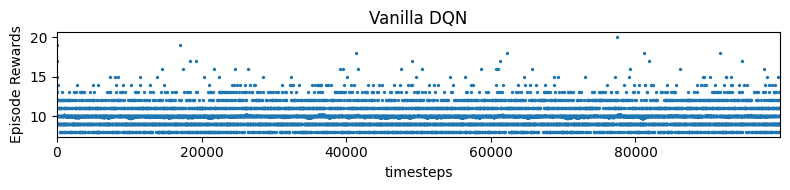

In [8]:
total_timesteps = 100000

vanilla_dqn.learn(total_timesteps)
display(ipythondisplay.HTML(visualize_model(vanilla_dqn)))
plot_results([log_dir], total_timesteps, "timesteps", "Vanilla DQN")


Jak widać, metoda Deep Q-Learning w domyślnym ustawieniu nie działa zbyt dobrze - model nie zbiega, oscylując wokół początkowych wartości nagrody. Być może strojenie hiperparametrów poprawiłoby osiągane rezultaty?

Sprawdźmy, jaka była maksymalna wartość zgromadzona w trakcie uczenia. Posłuży nam w tym celu funkcja `load_results`. Zwraca ona pandasowy DataFrame, w którym znajdują się informacje o każdym epizodzie w trakcie trenowania: uzyskanej nagrodzie `r`, długości epizodu `l` oraz jego czasie trwania `t`.


In [ ]:
results = load_results(log_dir)
display(results.head(5))
print(f"Max reward: {results.r.max()}")


index     r   l         t
0      0  12.0  12  0.030173
1      1  17.0  17  0.033229
2      2  15.0  15  0.036981
3      3  13.0  13  0.039139
4      4  19.0  19  0.082533

Max reward: 20.0


Spróbujemy powtórzyć wytrenowanie modelu, tym razem z wykorzystaniem *experience replay*.

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1980     |
|    fps              | 4765     |
|    time_elapsed     | 9        |
|    total timesteps  | 43212    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1984     |
|    fps              | 4763     |
|    time_elapsed     | 9        |
|    total timesteps  | 43299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1988     |
|    fps              | 4762     |
|    time_elapsed     | 9

Max reward: 360.0


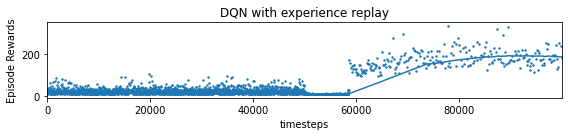

In [ ]:
batch_size = 64
lr = 1e-4
gamma = 0.8

env = gym.make("CartPole-v1")
log_dir = "/tmp/exp_replay/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, filename=log_dir)

dqn_exp = DQN(
    MlpPolicy, env,
    learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
    target_update_interval=batch_size,  # disable target network
    verbose=0,  # show information throughout training
)

total_timesteps = 100000

dqn_exp.learn(total_timesteps)
display(ipythondisplay.HTML(visualize_model(dqn_exp)))
plot_results([log_dir], total_timesteps, "timesteps", "DQN with experience replay")
results = load_results(log_dir)
print(f"Max reward: {results.r.max()}")


Jak widać rezultaty są dużo lepsze. Ale może udałoby się poprawić proces trenowania? Tego dotyczyć będą zadania.


## Zadanie 1

Zbadaj wpływ pozostałych ze wspomnianych hipeparametrów na trenowanie i działanie modelu. Skup się na zmianie architektury modelu strategii, hiperparametrach trenowania (gamma, epsilon itp.). Zapisz swoje wnioski oraz przygotuj wizualizacje uzyskiwanych rezultatów oraz animacje działania modelu.


In [5]:
import time
import itertools
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


def get_average_for_param(result: pd.DataFrame, param: str, score: str = "max_reward") -> pd.DataFrame:
    avg_scores = result.groupby(param)[score].mean()
    avg_scores_df = avg_scores.reset_index()
    avg_scores_df.columns = [param, score]
    return avg_scores_df

def plot_avg_scores(result: pd.DataFrame, param: str, score: str = "max_reward", ax: plt.Axes = None):
    avg_scores = get_average_for_param(result, param, score)
    avg_learning_time = get_average_for_param(result, param, "learning_time")

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax.set_xlabel(param.capitalize())
    ax.set_ylabel(score, color=color)
    ax.plot(avg_scores[param], avg_scores[score], color=color)
    ax.tick_params(axis='y', labelcolor=color)
    ax.legend([score], loc='upper left')

    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.set_ylabel("Learning Time", color=color)
    ax2.plot(avg_learning_time[param], avg_learning_time["learning_time"], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(["Learning Time"], loc='upper right')

    ax.yaxis.set_major_formatter('{x:.2f}')
    ax2.yaxis.set_major_formatter('{x:.2f} s')

    if ax is None:
        fig.tight_layout()
        plt.title(f"{score} and Learning Time for Different {param.capitalize()} Values per Dataset")
        plt.show()


def plot_all_avg_scores(result: pd.DataFrame, params: list[str], score: str = "max_reward"):
    num_plots = len(params)
    num_cols = num_plots
    num_rows = 1

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6))
    axs = axs.flatten()

    for i, param in enumerate(params):
        ax = axs[i]
        plot_avg_scores(result, param, score, ax=ax)

    # Hide empty subplots if there are any
    if num_plots < num_cols:
        for ax in axs[num_plots:]:
            ax.axis('off')

    fig.tight_layout()
    plt.show()

In [80]:
def train_model(gamma: float, tau: float, learning_rate: float):
    batch_size = 64
    
    env = gym.make("CartPole-v1")
    log_dir = f"/tmp/exp_replay/{gamma}_{tau}_{learning_rate}/" 
    os.makedirs(log_dir, exist_ok=True)
    env = Monitor(env, filename=log_dir) 

    dqn_exp = DQN(
        MlpPolicy, 
        env,
        learning_rate=learning_rate, 
        batch_size=batch_size, 
        gamma=gamma,
        tau=tau, 
        seed=SEED,
        target_update_interval=batch_size,
        verbose=0,
    )

    total_timesteps = 100000
    
    start_time = time.time()
    dqn_exp.learn(total_timesteps)
    end_time = time.time()
    
    results = load_results(log_dir)
    
    performance_metrics = {
        "max_reward": results.r.max(),
        "mean_reward": results.r.mean(),
        "median_reward": results.r.median(),
        "final_reward": results.r.iloc[-1],
        "reward_std": results.r.std(),
        "learning_time": end_time - start_time,
        "gamma": gamma,
        "tau": tau,
        "learning_rate": learning_rate
    }
    
    return performance_metrics

gammas = [0.75, 0.8, 0.9, 0.99]
taus = [0.001, 0.005, 0.01, 0.02, 0.04]
learning_rates = [1e-3, 1e-4]

params = list(itertools.product(gammas, taus, learning_rates))

cart_results = []
for i in tqdm(range(len(params)), total=len(params)):
    gamma, tau, lr = params[i]
    result = train_model(gamma, tau, lr)
    cart_results.append(result)
    
cart_results_df = pd.DataFrame(cart_results)

  0%|          | 0/40 [00:00<?, ?it/s]

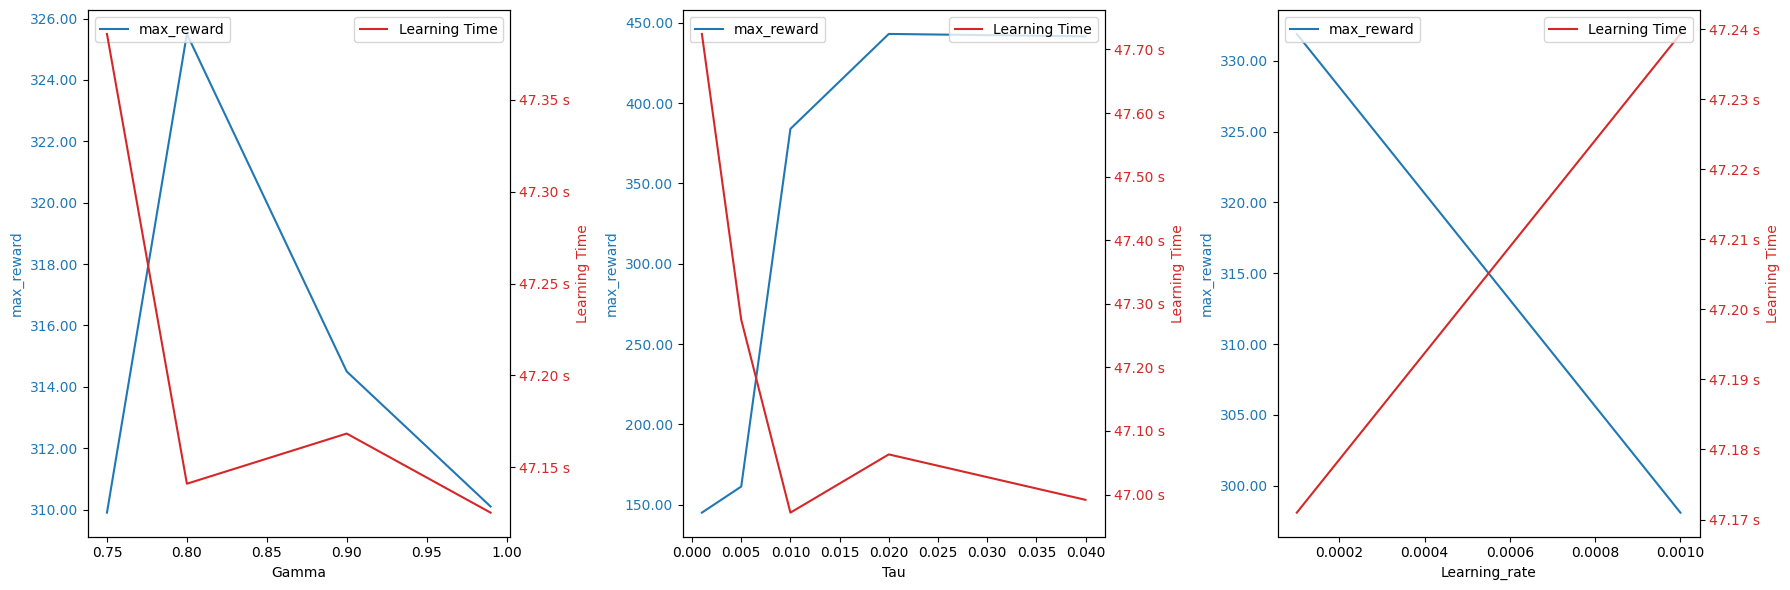

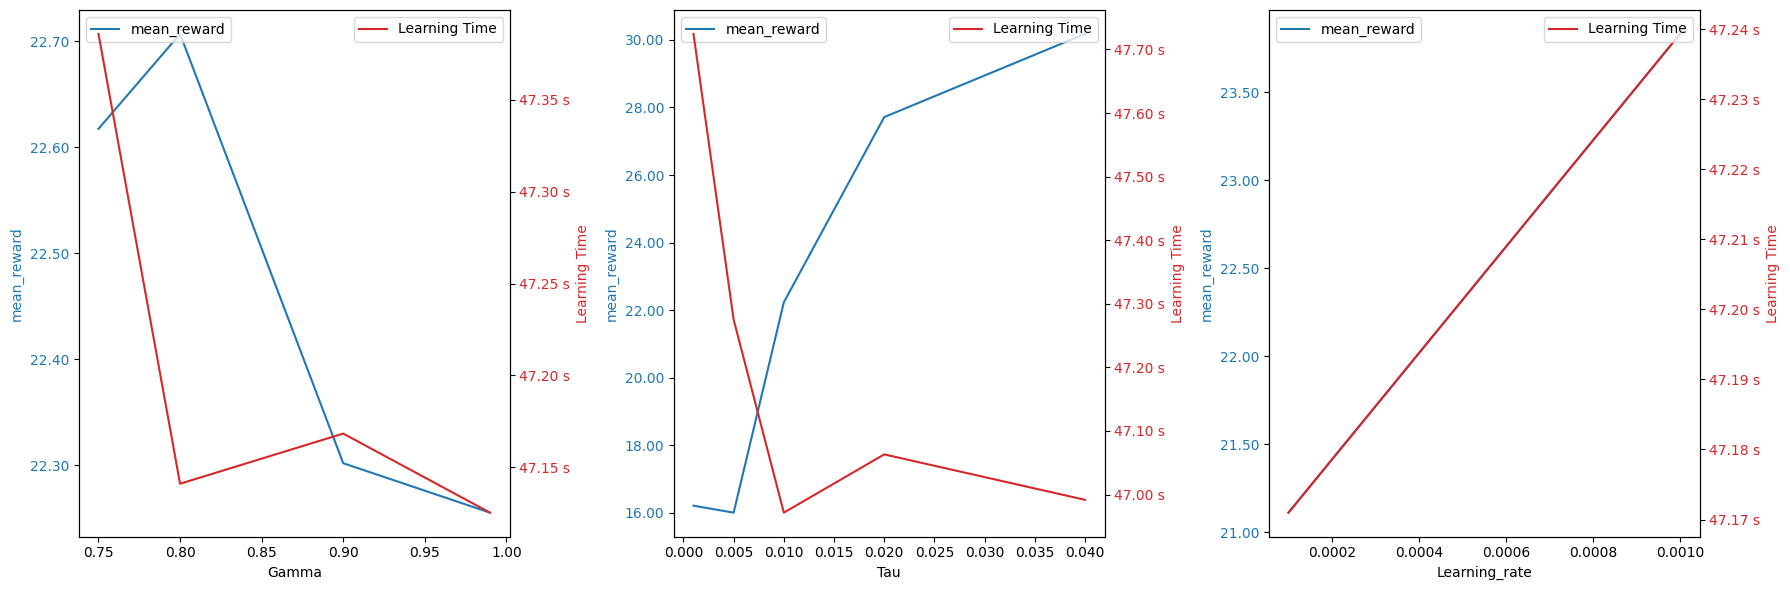

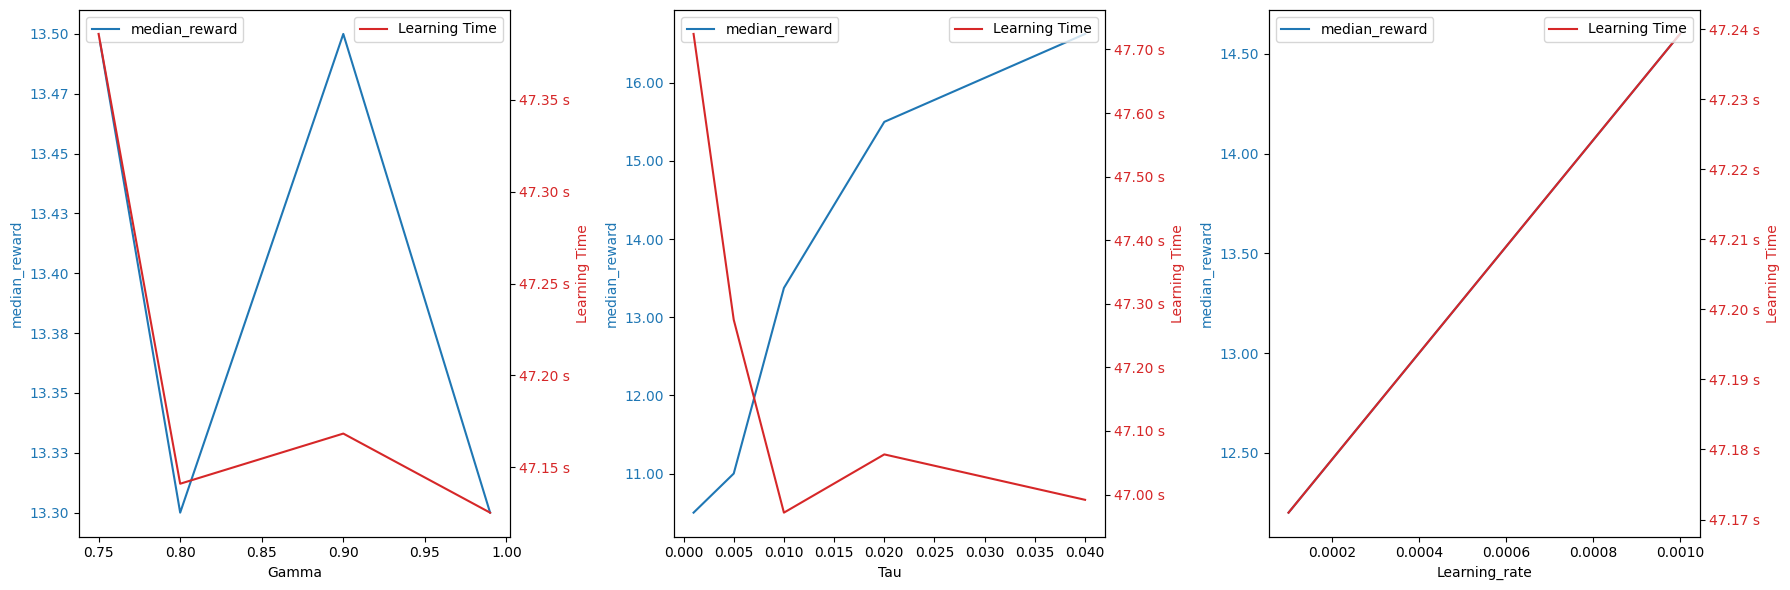

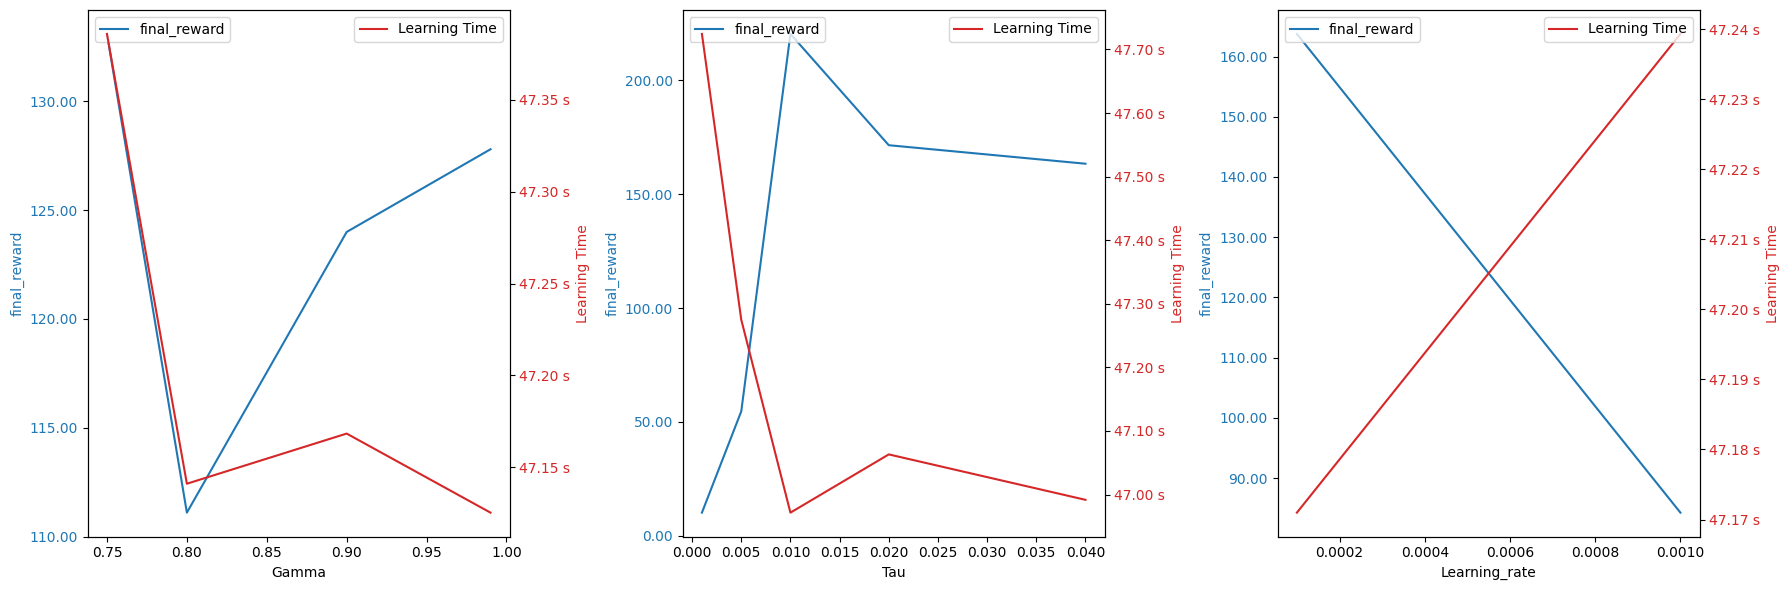

In [81]:
plot_all_avg_scores(cart_results_df, ["gamma", "tau", "learning_rate"], "max_reward")
plot_all_avg_scores(cart_results_df, ["gamma", "tau", "learning_rate"], "mean_reward")
plot_all_avg_scores(cart_results_df, ["gamma", "tau", "learning_rate"], "median_reward")
plot_all_avg_scores(cart_results_df, ["gamma", "tau", "learning_rate"], "final_reward")

In [92]:
print(cart_results_df.sort_values(by="max_reward", ascending=False).head(1))
cart_results_df.to_csv("cart_results.csv")

   max_reward  mean_reward  median_reward  final_reward  reward_std  \
8       500.0    33.250083           18.0         113.0   45.292326   

   learning_time  gamma   tau  learning_rate  
8      47.083536   0.75  0.04          0.001  


## Zadanie 2

Wykorzystaj metodę Deep Q-Learning do przygotowania agenta działającego w wybranym innym środowisku z biblioteki [Gym](https://gym.openai.com/envs). Ze względu na cechy modelu zwróć uwagę na dopasowanie środowiska (np. przestrzeń akcji powinna być dyskretna). Zapoznaj się z definicją funkcji nagrody przyznawanej agentowi w środowisku, aby można było zinterpretować rezultaty osiągane przez model. Jeśli zdecydujesz się na wykorzystanie środowiska z obserwacjami wizualnymi, pamiętaj o zmianie typu modelu strategii (uwaga: trenowanie modeli w oparciu o obserwacje wizualne z wykorzystaniem sieci konwolucyjnym jest długotrwałe i może być bardziej niestabilne niż w przypadku strategii MLP). Spróbuj dostroić hiperparametry trenowania do nowego środowiska.


In [4]:
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

def train_model(gamma: float, tau: float, sigma: float, timesteps: int = 500000, show_res: bool = False):
    batch_size = 64
    env_name = 'MountainCarContinuous-v0'
    env = gym.make(env_name)
    log_dir = f"/tmp/ddpg/{env_name}/{gamma}_{tau}/" 
    os.makedirs(log_dir, exist_ok=True)
    env = Monitor(env, filename=log_dir) 

    n_actions = env.action_space.shape[-1]
    action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=sigma * np.ones(n_actions))

    model = DDPG(
        "MlpPolicy",
        env,
        buffer_size=50000,
        batch_size=batch_size,
        gamma=gamma,
        tau=tau, 
        seed=SEED,
        action_noise=action_noise,
        verbose=0,
    )
    
    start_time = time.time()
    model.learn(total_timesteps=timesteps)
    end_time = time.time()
    
    results = load_results(log_dir)
    
    performance_metrics = {
        "max_reward": results.r.max(),
        "mean_reward": results.r.mean(),
        "median_reward": results.r.median(),
        "final_reward": results.r.iloc[-1],
        "reward_std": results.r.std(),
        "learning_time": end_time - start_time,
        "gamma": gamma,
        "tau": tau,
        "sigma": sigma
    }
    if show_res:
        display(ipythondisplay.HTML(visualize_model(model)))
        plot_results([log_dir], timesteps, "timesteps", "DDPG")

    return performance_metrics

  0%|          | 0/12 [00:00<?, ?it/s]

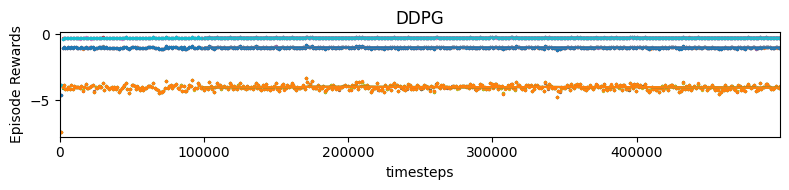

In [14]:
gammas = [0.8, 0.9]
taus = [0.02, 0.04]
sigmas = [0.05, 0.1, 0.2]

params = list(itertools.product(gammas, taus, sigmas))

car_results = []
for i in tqdm(range(len(params)), total=len(params)):
    gamma, tau, sigma = params[i]
    result = train_model(gamma, tau, sigma)
    car_results.append(result)
    checkpoint = pd.DataFrame(car_results)
    checkpoint.to_csv(f"checkpoint{i}.csv")

car_results_df = pd.DataFrame(car_results)

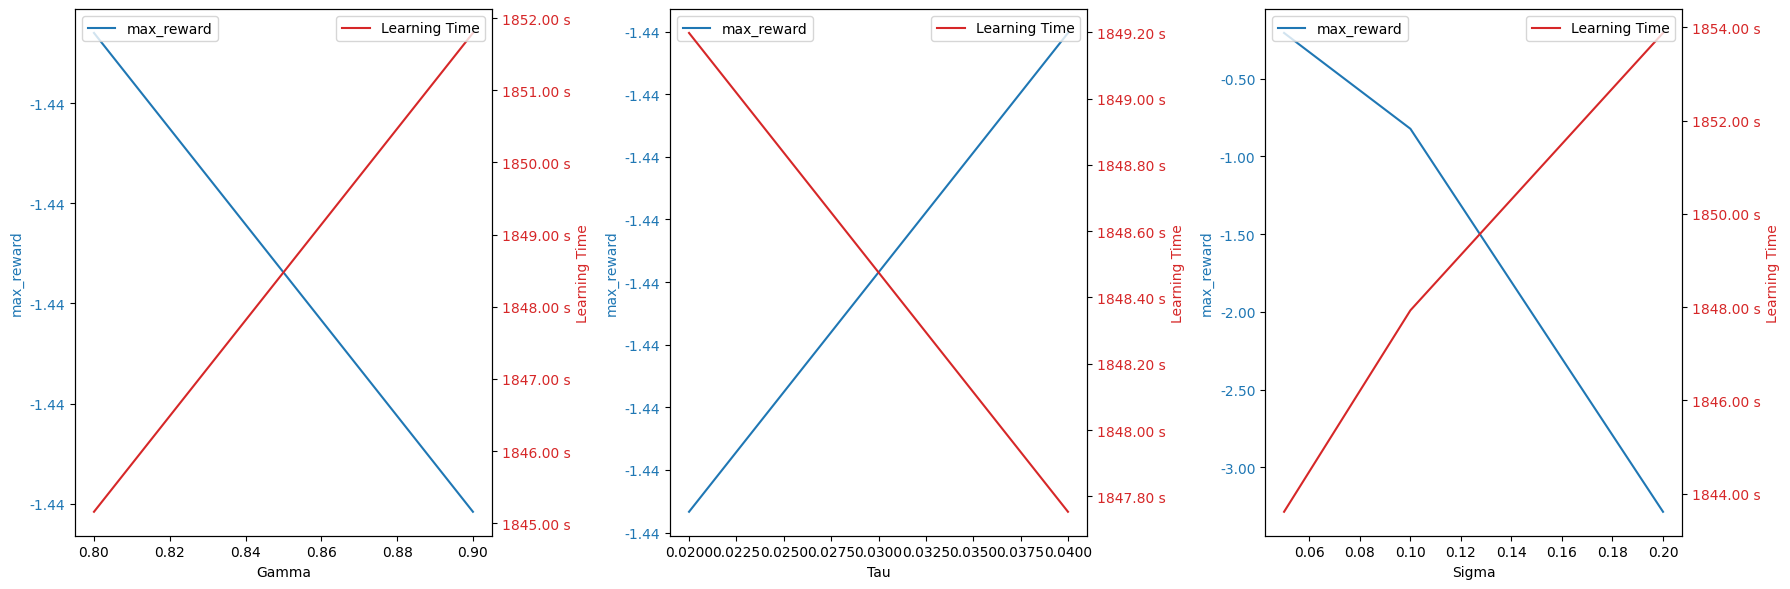

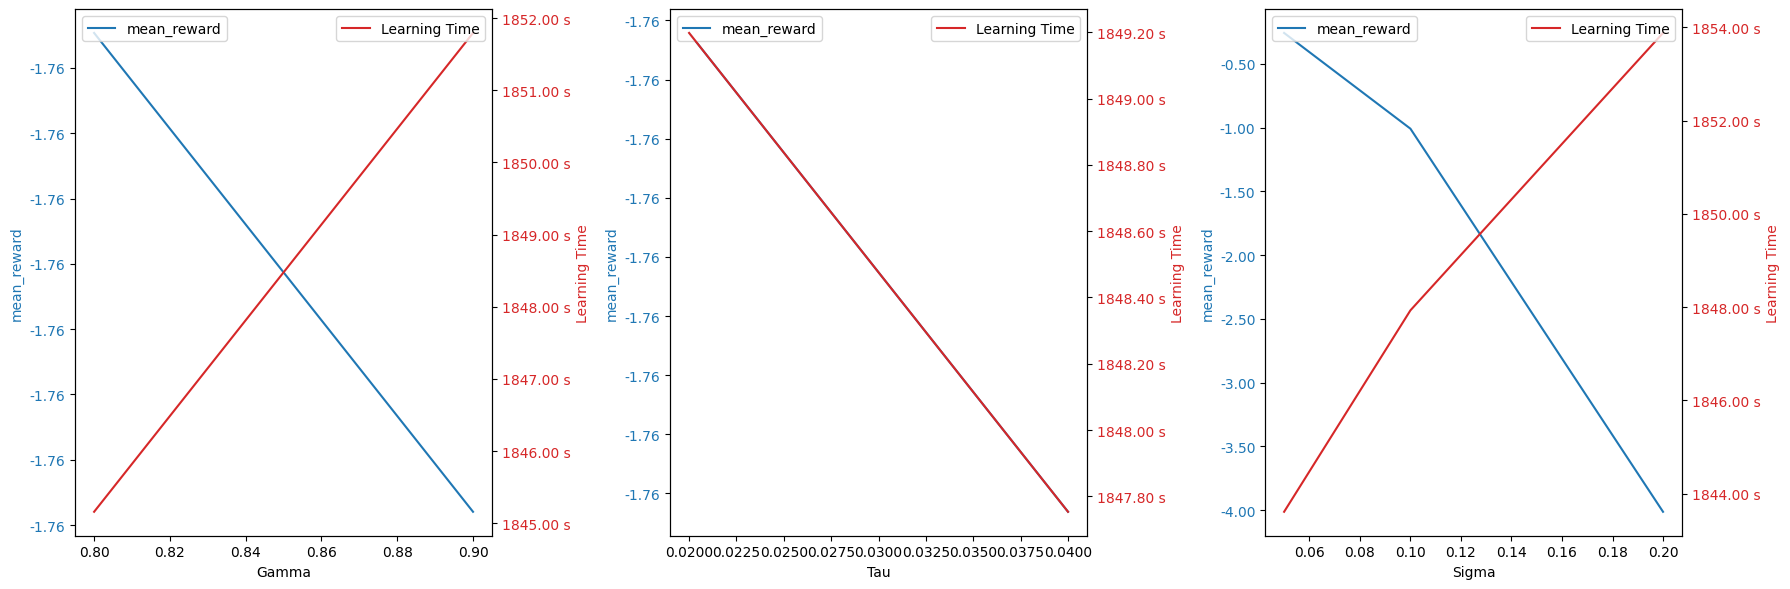

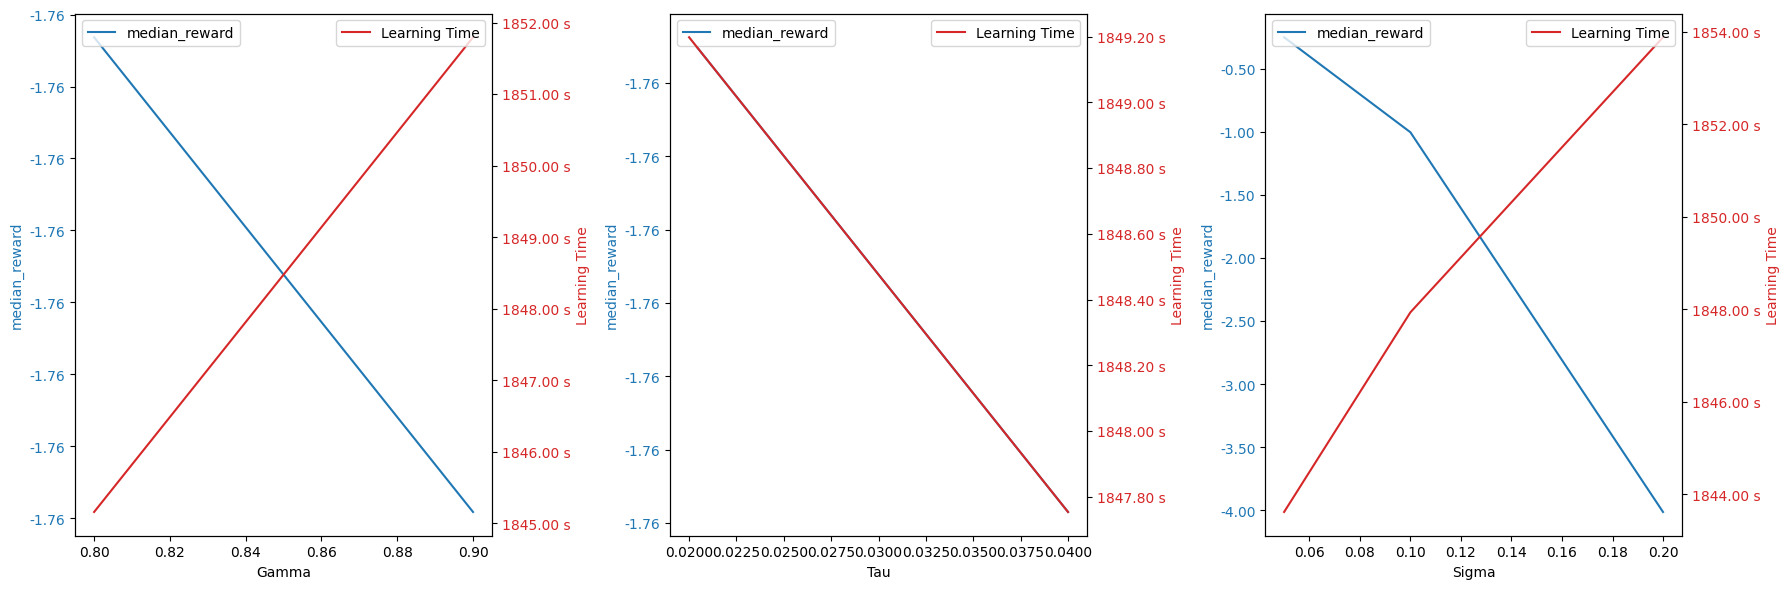

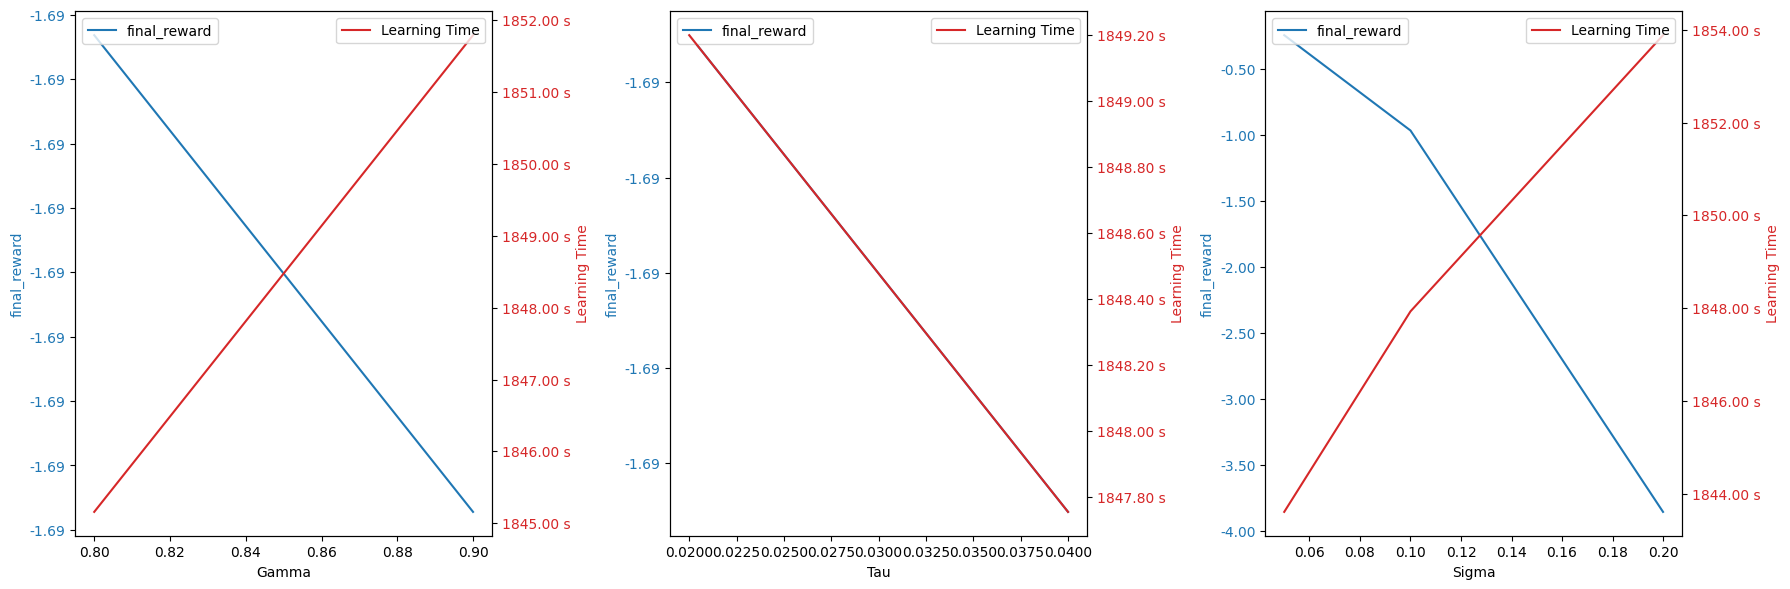

In [15]:
plot_all_avg_scores(car_results_df, ["gamma", "tau", "sigma"], "max_reward")
plot_all_avg_scores(car_results_df, ["gamma", "tau", "sigma"], "mean_reward")
plot_all_avg_scores(car_results_df, ["gamma", "tau", "sigma"], "median_reward")
plot_all_avg_scores(car_results_df, ["gamma", "tau", "sigma"], "final_reward")

In [17]:
print(car_results_df.sort_values(by="max_reward", ascending=False).head(1))

   max_reward  mean_reward  median_reward  final_reward  reward_std  \
0   -0.205534    -0.258522       -0.25149     -0.240443    0.162001   

   learning_time  gamma   tau  sigma  
0    1834.527492    0.8  0.02   0.05  


In [ ]:
result = train_model(0.8, 0.02, 0.01, 2500000, True)
pd.DataFrame([result]).to_csv("final.csv")
print(pd.DataFrame([result]))

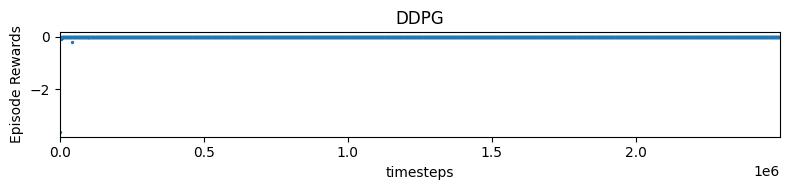

In [7]:
env_name = 'MountainCarContinuous-v0'
log_dir = f"/tmp/ddpg/{env_name}/{0.8}_{0.02}/" 
results = load_results(log_dir)
plot_results([log_dir], 2500000, "timesteps", "DDPG")